## Natural Language Processing (NLP)

### Natural language processing is a subset of Artificial intelligence that helps computers to understand, interpret, and utilize the human languages. NLP allows computers to communicate with peoples using human languages. NLP also provides computers with the ability to read text, hear speech, and try to intrepret it. NLP draws several disciplines, including Computational linguistics and computer science, as this attempts to fill the gap in between human and computer communication.
NLP is the driving technology that allows machines to understand and interact with human speech, but is not limited to voice interactions. Natural language processing is also the technology behind apps such as customer service chatbots. In addition, NLP enables email and SMS apps to automatically suggest replies or text to complete a message as it is typed. These applications, just like voice assistants, cannot intuitively understand human (or “natural”) language.

### NLP breaks down language into shorter, more basic pieces, called tokens(period, words, etc), and attempts to understand the relationships of tokens

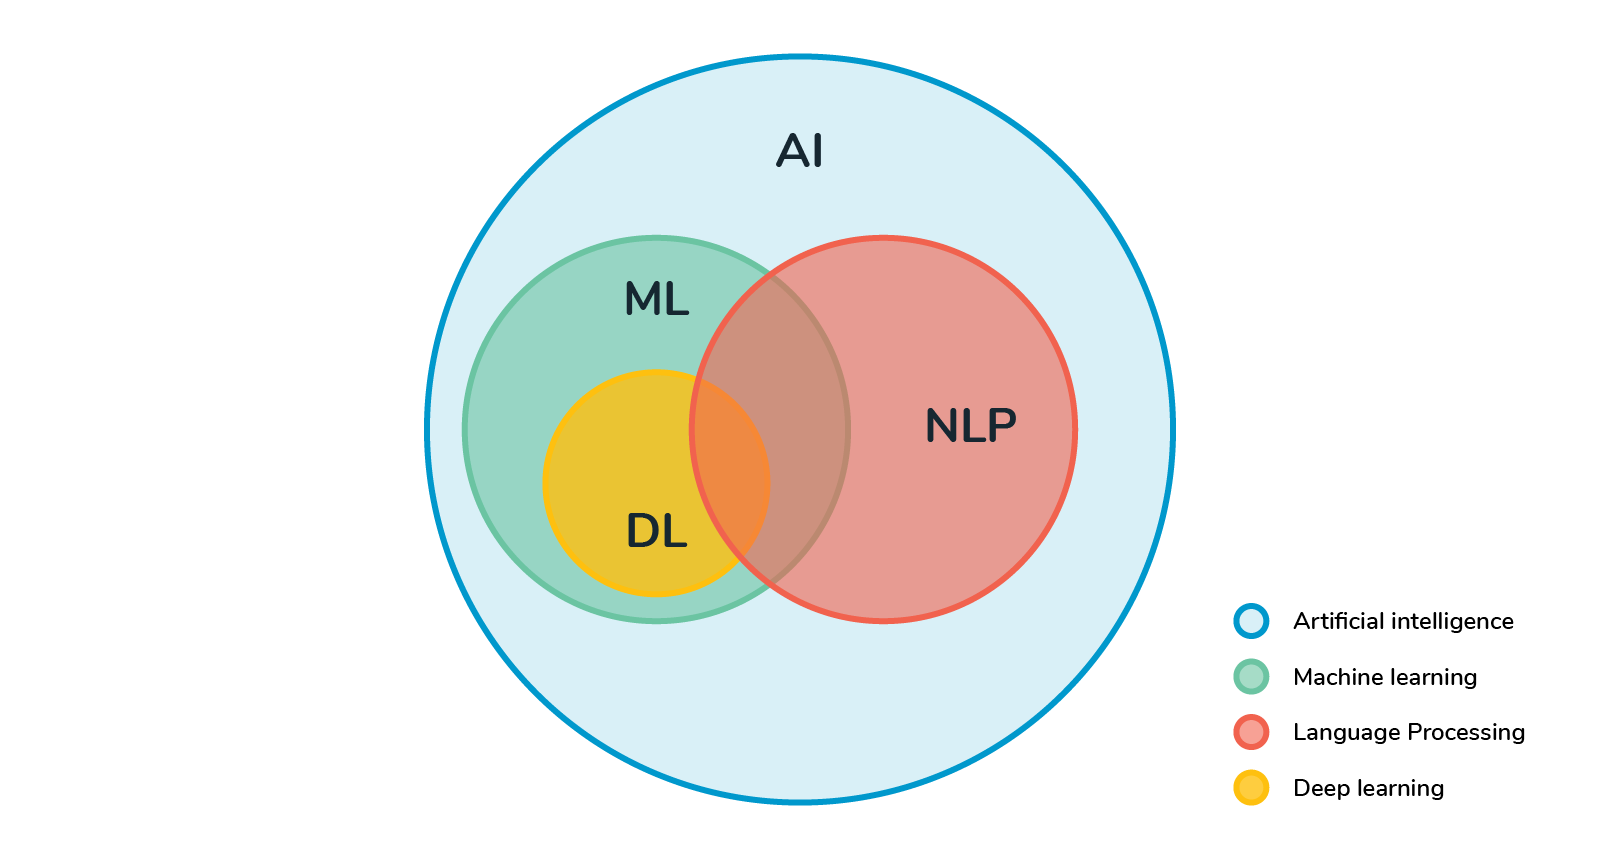

## Applications of NLP

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [4]:
df=pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv',sep='\t')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.shape

(900, 2)

In [7]:
df.loc[df.duplicated(), :]

,Review,Liked
814,I love this place.,1
816,The food was terrible.,0
843,I won't be back.,0
846,I would not recommend this place.,0


In [8]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

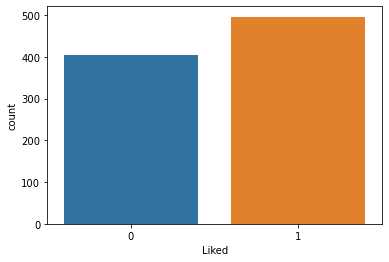

In [9]:
sns.countplot('Liked',data=df)

In [10]:
lem=WordNetLemmatizer()
corpus=[]

for i in range(len(df)):
    review=re.sub('[^a-zA-z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(j) for j in review if j not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)
print(corpus)

['wow loved place', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place worth time let alone vega', 'like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer decent deal', 'like

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

x=cv.fit_transform(corpus).toarray()
y=df['Liked'].values

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=1420)

# x=cv.fit_transform(corpus).toarray()
# y=df['Liked'].values

In [12]:
x.shape

(900, 1640)

In [69]:
# saving bow for later use
import pickle
filename = 'bow_restaurant_analysis.sav'
pickle.dump(cv, open(filename, 'wb'))

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [20]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(x_train,y_train)

print('Accuracy Score : ',model1.score(x_test,y_test))

Accuracy Score :  0.7444444444444445


In [70]:
import pickle
filename = 'nb_model_restaurant_analysis.sav'
pickle.dump(model1, open(filename, 'wb'))

<AxesSubplot:>

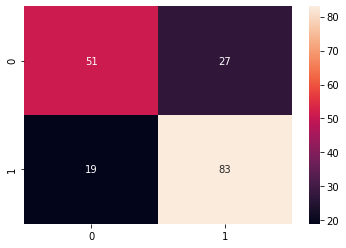

In [15]:
y_pred=model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
print('Classification Report of naive_bayes : \n',classification_report(y_test,y_pred))

Classification Report of naive_bayes : 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        78
           1       0.75      0.81      0.78       102

    accuracy                           0.74       180
   macro avg       0.74      0.73      0.74       180
weighted avg       0.74      0.74      0.74       180



In [18]:
2*(0.73*0.65/(0.73+0.65))

0.6876811594202898

In [19]:
2*(0.75*0.81/(0.75+0.81))

0.7788461538461539

In [68]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)

print('Accuracy Score : ',model2.score(x_test,y_test))

Accuracy Score :  0.7


### Predicting sentiment on fresh reviews

In [2]:
reviews=pd.read_csv('a2_RestaurantReviews_FreshDump.tsv',sep='\t')

In [3]:
reviews.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


In [4]:
reviews.shape

(100, 1)

#### Data Cleaning

In [5]:
lem=WordNetLemmatizer()
corpus1=[]

for i in range(len(reviews)):
    review=re.sub('[^a-zA-z]',' ',reviews['Review'][i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(j) for j in review if j not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)
print(corpus1)

['spend money elsewhere', 'regular toasted bread equally satisfying occasional pat butter mmmm', 'buffet bellagio far anticipated', 'drink weak people', 'order correct', 'also feel like chip bought made house', 'disappointing dinner went elsewhere dessert', 'chip sals amazing', 'returning', 'new fav vega buffet spot', 'seriously cannot believe owner many unexperienced employee running around like chicken head cut', 'sad', 'felt insulted disrespected could talk judge another human like', 'call steakhouse properly cook steak understand', 'impressed concept food', 'thing crazy guacamole like pur ed', 'really nothing postinos hope experience better', 'got food poisoning buffet', 'brought fresh batch fry thinking yay something warm', 'hilarious yummy christmas eve dinner remember biggest fail entire trip u', 'needle say going back anytime soon', 'place disgusting', 'every time eat see caring teamwork professional degree', 'ri style calamari joke', 'however much garlic fondue barely edible',

##### Data Transformation

In [6]:
import pickle
cv1 = pickle.load(open('bow_restaurant_analysis.sav', 'rb'))

In [7]:
x_fresh=cv1.transform(corpus1).toarray()
x_fresh.shape

(100, 1640)

##### Prediction Using Sentiment Classifier

In [8]:
classifier = pickle.load(open('nb_model_restaurant_analysis.sav', 'rb'))

In [10]:
y_pred=classifier.predict(x_fresh)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
reviews['Predicted_label']=y_pred.tolist()
reviews.head(20)

,Review,Predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",1
4,-My order was not correct.,1
5,"Also, I feel like the chips are bought, not ma...",1
6,After the disappointing dinner we went elsewhe...,0
7,The chips and sals a here is amazing!!!!!!!!!!...,1
8,We won't be returning.,1
9,This is my new fav Vegas buffet spot.,1
